<a href="https://colab.research.google.com/github/amarks5/final_project/blob/ali_ahrabi/CancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving Cancer.csv to Cancer (1).csv


In [107]:
#Categorical Data (scale of 1-10 for each sypthom.)
df = pd.read_csv("Cancer.csv")
df.head()


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [108]:
df.drop(['Patient Id'],axis=1,inplace=True)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [109]:
df.shape

(1000, 24)

In [110]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       5 non-null      int64 
 1   Gender                    5 non-null      int64 
 2   Air Pollution             5 non-null      int64 
 3   Alcohol use               5 non-null      int64 
 4   Dust Allergy              5 non-null      int64 
 5   OccuPational Hazards      5 non-null      int64 
 6   Genetic Risk              5 non-null      int64 
 7   chronic Lung Disease      5 non-null      int64 
 8   Balanced Diet             5 non-null      int64 
 9   Obesity                   5 non-null      int64 
 10  Smoking                   5 non-null      int64 
 11  Passive Smoker            5 non-null      int64 
 12  Chest Pain                5 non-null      int64 
 13  Coughing of Blood         5 non-null      int64 
 14  Fatigue                   5 no

In [111]:
df.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [112]:
df.Level.value_counts()


High      365
Medium    332
Low       303
Name: Level, dtype: int64

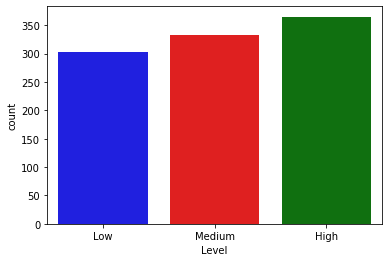

In [113]:
plot=sns.countplot(data=df, x='Level',palette=['blue','red','green'])


In [114]:
df.Gender.value_counts()


1    598
2    402
Name: Gender, dtype: int64

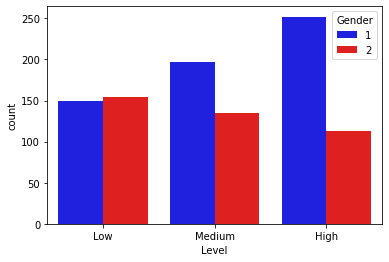

In [115]:
plot=sns.countplot(data=df, x='Level', hue='Gender', palette=['blue','red'])#Count 


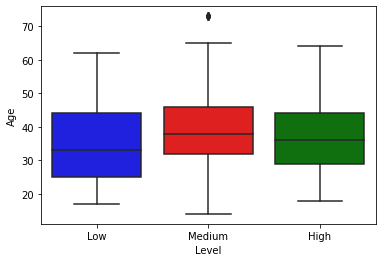

In [116]:
plot=sns.boxplot(data=df, x='Level', y='Age', palette=['blue','red','green'])#Count plot


In [117]:
#Anova Test(F-Test)The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.
#Categories of Ordinal Variables : The Matched Category --> 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split



In [118]:
# split into input (X) and output (y) variables
#Feature Selection
X=df.drop(['Level'], axis=1)
Y=df['Level']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
print(fit.scores_)
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':bestfeatures.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)


[   5.7525236    13.95146101  466.78559005  540.24308183  558.63539542
  413.33158061  488.98077993  316.04964468  689.93786068 1190.53667306
  369.48301716  722.18910137  404.80106585 1037.55861849  328.92891532
   97.64638765  183.39293937  111.397835     44.67981832  107.64910335
  127.07094251   81.8490122    70.28362711]


,Feature,Scores
9,Obesity,1190.536673
13,Coughing of Blood,1037.558618
11,Passive Smoker,722.189101
8,Balanced Diet,689.937861
4,Dust Allergy,558.635395
3,Alcohol use,540.243082
6,Genetic Risk,488.980780
2,Air Pollution,466.785590
5,OccuPational Hazards,413.331581
12,Chest Pain,404.801066


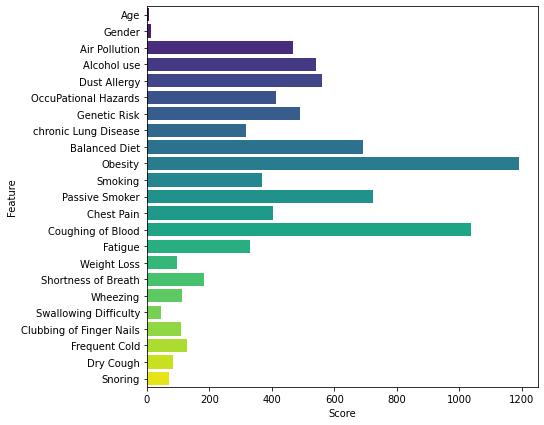

In [119]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')


In [120]:
selection=featureScores[featureScores['Score']>=200]#Selects features that scored more than 200
selection=list(selection['Feature'])
selection.append('Level')
cancer=df[selection]
cancer.head() 

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
0,2,4,5,4,3,2,2,4,3,2,2,4,3,Low
1,3,1,5,3,4,2,2,2,2,4,2,3,1,Medium
2,4,5,6,5,5,4,6,7,2,3,4,8,8,High
3,7,7,7,7,6,7,7,7,7,7,7,8,4,High
4,6,8,7,7,7,6,7,7,8,7,7,9,3,High


In [121]:
#StandardScaler is used to perform Feature Scaling. Feature Scaling is a phase in Data Preprocessing. Basically, we use Standard Scalar in order to scale the magnitude of the feature in a certain range
from sklearn.preprocessing import StandardScaler


In [122]:
X_train,X_test,y_train,y_test = train_test_split(cancer.drop(['Level'], axis=1), cancer['Level'],test_size=0.25, random_state=0)

#Checking the shapes
print("X_train shape :",X_train.shape)
print("Y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",y_test.shape)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train shape : (750, 13)
Y_train shape : (750,)
X_test shape : (250, 13)
Y_test shape : (250,)


In [123]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 









In [124]:
pipeline_svm=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',SVC(random_state=0))])

In [125]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [126]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [127]:
## LEts make the list of pipelines
pipelines = [pipeline_svm, pipeline_dt, pipeline_randomforest]

In [128]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [129]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Support vector machines', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [130]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Support vector machines Test Accuracy: 0.872
Decision Tree Test Accuracy: 1.0
RandomForest Test Accuracy: 1.0


In [131]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Decision Tree
